Understanding the data

In [41]:
import pandas as pd

In [5]:
advertising = pd.read_csv("/content/tvmarketing.csv")

advertising.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
advertising.describe()

#tv - advertising budget for TV marketing
#sales - actual sales of the product

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [10]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

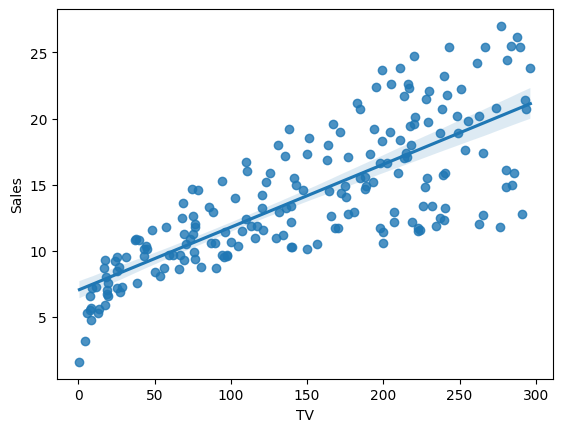

In [12]:
#dependent and independent variables

#visualise with regression plot (not a model!)
sns.regplot(x="TV", y="Sales", data=advertising)

In [18]:
#Pearson correlation
advertising.corr()

advertising["TV"].corr(advertising["Sales"]) #0.78 strong positive correlation

0.7822244248616061

**Supervised vs unuspervised training**

![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

Training linear regression model

In [22]:
#preparing X and Y

X = advertising.drop("Sales", axis=1) #independent variable
Y = advertising.drop("TV", axis = 1) #the outcome, dependant variable

Train and test data sets

In [23]:
#splitting the data into trainign and test data sets

from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7) #70% of data will be used for train, 30% for test

In [27]:
X_train

,TV
72,26.8
38,43.1
17,281.4
20,218.4
147,243.2
...,...
181,218.5
65,69.0
131,265.2
152,197.6


In [30]:
#column - feature
#row - observation

Train the model

In [28]:
from sklearn.linear_model import LinearRegression #import the model

In [29]:
model = LinearRegression() #initialize the model

In [31]:
model.fit(X_train, Y_train) #fit the model on our data

LinearRegression()

In [32]:
### Y = mX + b ###
print(f"Model intercept: {model.intercept_}")
print(f"Model coefficient: {model.coef_}")

Model intercept: [6.72379996]
Model coefficient: [[0.04970491]]


In [38]:
my_new_budget = [[150]] #2D array data set

my_predicted_sales = model.predict(my_new_budget)
print(f"Predicted sales: {round(my_predicted_sales[0][0])}, if the new marketing budget for TV is {my_new_budget[0][0]}.")

Predicted sales: 14, if the new marketing budget for TV is 150.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
#testing the trained data set

Y_pred = model.predict(X_test)

In [45]:
final_df = pd.DataFrame()
final_df["TV"] = X_test["TV"]
final_df["Actual sales"] = Y_test["Sales"]
final_df["Predicted sales"] = Y_pred
final_df.head()

,TV,Actual sales,Predicted sales
172,19.6,7.6,7.698016
74,213.4,17.0,17.330828
100,222.4,11.7,17.778173
40,202.5,16.6,16.789045
32,97.2,9.6,11.555117


In [46]:
final_df["ABS_Error_Actual_vs_Predicted"] = abs(final_df["Actual sales"] - final_df["Predicted sales"])
final_df.head()

,TV,Actual sales,Predicted sales,ABS_Error_Actual_vs_Predicted
172,19.6,7.6,7.698016,0.098016
74,213.4,17.0,17.330828,0.330828
100,222.4,11.7,17.778173,6.078173
40,202.5,16.6,16.789045,0.189045
32,97.2,9.6,11.555117,1.955117
